### Imports

In [1]:
import openai
from rich import print
from getpass import getpass

oai_api_key = getpass()

 ········


### Basic Prompting

We'll be using the OpenAI Python SDK. Using `gpt-3.5-turbo` & `gpt-4.1`, which has 1M input tokens interchangably.

In [3]:
client = openai.Client(api_key=oai_api_key)

response = client.responses.create(
    model="gpt-4.1-mini", input="Write a simple email about asking for leave."
)

print(response.output_text)

Subject: Request for Leave

Dear [Manager's Name],

I hope you are well. I would like to request leave from  to  due to . Please let me know if you need any further 
information.

Thank you for your understanding.

Best regards,  
[Your Name]

#### Instruction Following Prompt

In [4]:
response = client.responses.create(
    model="gpt-3.5-turbo",
    instructions="You are an employee in a small scale Indian company, where managers are quite strict. Make it very formal \
    and convincing and verbose.",
    input="Write a simple email about asking for leave.",
)

print(response.output_text)

Subject: Request for Leave

Dear Manager,

I hope this email finds you well. I am writing to formally request a leave of absence from work for  starting from 
to . The reason for my leave is .

I have made sure to complete all my pending tasks and have informed my colleagues about my absence to ensure that 
the work does not get disrupted in my absence. I will be available on phone and email if there are any urgent 
matters that require my attention during my leave.

I have attached the necessary documents, such as a doctor's note or any relevant details, to support my leave 
request. I understand the importance of my role in the company and will make sure to fulfill any pending 
responsibilities upon my return.

I kindly request your approval for this leave and assure you that I will resume work with renewed dedication and 
focus upon my return.

Thank you for considering my request. I look forward to your positive response.

Warm regards,

[Your Name]
[Your Position]
[Company Name]

#### Chain of Thought

In [5]:
response = client.responses.create(
    model="gpt-3.5-turbo",
    instructions="You are an employee in a small scale Indian company, where managers are quite strict. Make it very formal \
    and convincing and verbose.",
    input="Write a simple email about asking for leave. Plan step by step and think carefully.",
)

print(response.output_text)

Subject: Request for Leave Approval

Dear [Manager's Name],

I hope this email finds you well.

I am writing to formally request your approval for a period of leave from work. I have carefully considered the 
timing and impact of my absence, and I am confident that I have made all necessary arrangements to ensure that my 
responsibilities are taken care of during my absence.

Below, I have outlined the steps of my leave request in detail:

1. Reason for Leave:
I am requesting this leave for personal reasons, specifically for attending to a family matter that requires my 
immediate attention and presence.

2. Duration of Leave:
I am requesting  days off, starting from  to . I have ensured that this period does not coincide with any critical 
projects or deadlines, and have briefed my colleagues on any pending tasks that may require attention during my 
absence.

3. Handover Plan:
I have prepared a comprehensive handover document outlining the status of my projects, responsibilities, and 
pending tasks. I have also identified a colleague who will step in to address any urgent matters that may arise in 
my absence.

4. Availability:
I will be reachable via email and phone during my leave period, and will make myself available to provide any 
necessary support or guidance to my colleagues if required.

I understand the importance of my role within the team and the impact of my absence on our operations. I assure you
that I have taken all necessary precautions to minimize any disruption to our work during my leave.

I kindly request your prompt consideration and approval of my leave request. I am committed to ensuring a smooth 
transition during my absence and to returning to work with renewed energy and focus upon my return.

Thank you for your understanding and support.

Warm regards,
[Your Name]

In [6]:
response = client.responses.create(
    model="gpt-4.1-mini",
    instructions="You are an employee in a small scale Indian company, where managers are quite strict. Make it very formal \
    and convincing and verbose.",
    input="Write a simple email about asking for leave. Plan step by step and think carefully.",
)

print(response.output_text)

Certainly! When writing a formal and convincing leave request email to a strict manager in a small-scale Indian 
company, it's important to be polite, clear, and provide all necessary details. Here's a step-by-step plan followed
by a formal email example:

### Step-by-Step Plan:
1. **Subject Line**: Clearly mention the purpose of the email.
2. **Salutation**: Use a formal greeting.
3. **Introduction**: Start with a courteous opening statement.
4. **Purpose of the Email**: Clearly state the reason for the leave request.
5. **Duration**: Specify the dates for which leave is requested.
6. **Reason**: Briefly explain the reason for the leave without going into excessive personal details.
7. **Assurance**: Assure that your work will not be disrupted, or mention any arrangements made.
8. **Request for Approval**: Politely request the manager’s approval for the leave.
9. **Closing**: Thank them for their time and consideration.
10. **Sign-off**: Use a formal closing, followed by your full name and designation.

---

### Sample Formal Leave Request Email:

**Subject:** Request for Leave from [Start Date] to [End Date]

Dear [Manager’s Name],

I hope this message finds you well. I am writing to formally request leave for a duration of  starting from  to , 
due to .

I have ensured that all my current assignments will be up to date before my leave begins, and I have made 
arrangements to hand over any pending tasks to  during my absence. I will also be available for any urgent queries 
via email, if required.

I kindly seek your approval for this leave request and would be grateful for your understanding and support. Please
let me know if any further information is required.

Thank you very much for your time and consideration.

Yours sincerely,  
[Your Full Name]  
[Your Designation]  
[Your Contact Information]

---

Would you like me to draft a specific email based on your exact dates and reason?

#### If I want to get a json response with these how do I get it?

```json

{
    "subject": "....",
    "body": "...",
    "designation": "",
    "contact_info": "",
}
```

# multi line prompt use """ """"
"""

"""

In [18]:
response = client.responses.create(
    model="gpt-4.1-mini",
    instructions="""You are an employee in a small scale Indian company, where managers are quite strict. Make it very formal \
    and convincing and verbose. I need the data in the following json format \
    {
    "subject": "....",
    "body": "...",
    "designation": "",
    "contact_info": "",
    "age": ""
    }""",
    input="Write a simple email about asking for leave.",
)

print(response.output_text)

{
  "subject": "Request for Leave Approval",
  "body": "Respected Sir/Madam,\n\nI hope this message finds you in excellent health and high spirits. I am writing
to formally request leave for a specified period due to personal reasons that require my immediate attention. I 
assure you that I have taken all necessary measures to ensure that my ongoing responsibilities and tasks will be 
managed efficiently during my absence. Kindly grant me leave from  to . I am committed to resuming my duties with 
the same dedication upon my return.\n\nI would be grateful if you could consider my request favorably and provide 
your approval at your earliest convenience.\n\nThank you very much for your understanding and support.\n\nYours 
faithfully,\n\n[Your Name]",
  "designation": "[Your Designation]",
  "contact_info": "[Your Contact Information]",
  "age": "[Your Age]"
}

In [9]:
def parser(output_text):
    """
        Do parsing here
    """
    pass

In [ ]:
parser(response.output_text)

### Enter Structured Outputs


Most of the other models + sdks have a similar set of prompting fundamentals. Next set of steps would be the same.

Till this point, everyone used to work with the similar responses. There were issues, a lot of them:

1. Prompt responses were just text
2. You "could" get a json response, but even then it was very inconsistent.
3. Building on top of text for applications becomes more difficult.
4. Writing evalulations/test against these is also nasty work.

Thankfully, all the providers now provide solutions to structured outputs (Very recent: Aug, 2024 release). Here's a [github-repo](https://github.com/imaurer/awesome-llm-json) for an overview about llms with json outputs.

JSON being the lingua-franca of the web space. (Not Jason Statham)

![json-statham](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTJzk-4jdjQnm7Sqi2_BPLZ2dLBEaTK51uGfQ&s)

This JSON

![json](https://code.visualstudio.com/assets/docs/languages/json/json_hero.png)

There are 2 ways to get structured outputs:

1. JSON Mode embedded in the LLM calling: OpenAI, , DeepSeek (and a few others have json mode) having varying degrees of reliability. OpenAI themselves 
2. Function calling: Newer, more powerful way to get much better outputs with tools (web search, code editor, etc).

Both the above are paired with data validation/typing libraries in Python (Pydantic) and Zod (JS) to get standardized outputs. OpenAI and most other providers have their SDKs working with Pydantic.

### Using Pydantic

Python has internal `dataclasses` and `types` now, but still aren't enforced at runtime. To get to a place where custom types are easy to implement, Pydantic was the first library that let us do it.

#### [Detour] Why do we use types in programming?

- Auto-completion in the IDE (though one would argue that cursor `tabs` now fix these issues).
- You know what is the output looking at the function definition. Easier to debug for you as well as LLM.



#### Function

In [15]:
def process_items(prices: dict[str, float]):
    for item_name, item_price in prices.items():
        print(item_name, item_price)

In [16]:
process_items({"apple": 1.5, "banana": 2.0})

apple 1.5

banana 2.0

In [17]:
process_items({"apple": 1.0, "banana": "pratos"})

apple 1.0

banana pratos

#### Pydantic Example

In [20]:
from typing import Annotated

from annotated_types import Gt

from pydantic import BaseModel

In [27]:
class FruitPrice(BaseModel):
    name: str
    price: float


fruit1 = FruitPrice(name="Apple", price=1.0)
fruit2 = FruitPrice(name="Banana", price=2.0)

In [28]:
print(fruit1)

FruitPrice(name='Apple', price=1.0)

In [29]:
type(fruit1)

__main__.FruitPrice

In [30]:
fruit1.name

'Apple'

In [24]:
fruit1.price

1.0

In [25]:
def process_items(prices: list[FruitPrice]) -> None:
    for item in prices:
        print(type(item))
        print(item.name, item.price)

In [31]:
process_items([fruit1, fruit2])

<class '__main__.FruitPrice'>

Apple 1.0

<class '__main__.FruitPrice'>

Banana 2.0

In [ ]:
class FruitPrice(BaseModel):
    name: str
    price: float

In [32]:
class FruitPrice(BaseModel):
    name: str
    price: Annotated[float, Gt(1.0)]

In [33]:
def process_items(prices: list[FruitPrice]) -> None:
    for item in prices:
        print(item.name, item.price)


fruit1 = FruitPrice(name="Apple", price=0.9)
fruit2 = FruitPrice(name="Banana", price=2.0)
process_items([fruit1, fruit2])

ValidationError: 1 validation error for FruitPrice
price
  Input should be greater than 1 [type=greater_than, input_value=0.9, input_type=float]
    For further information visit https://errors.pydantic.dev/2.11/v/greater_than

You can increase the complexity of the model by adding more fields or combining two different types.


In [34]:
from typing import Annotated
from enum import Enum

class FruitColor(Enum):
    RED = "red"
    GREEN = "green"

class FruitTasteMeter(BaseModel):
    sweetness: float
    sourness: float
    bitterness: float

class FruitInfo(BaseModel):
    name: str
    price: float
    color: FruitColor
    weight: Annotated[float, Gt(0)]
    taste: FruitTasteMeter

fruit1 = FruitInfo(name="Apple", price=0.9, color=FruitColor.RED, weight=1.0, \
    taste=FruitTasteMeter(sweetness=0.9, sourness=0.1, bitterness=0.0))

print(fruit1)

FruitInfo(
    name='Apple',
    price=0.9,
    color=<FruitColor.RED: 'red'>,
    weight=1.0,
    taste=FruitTasteMeter(sweetness=0.9, sourness=0.1, bitterness=0.0)
)

These nice little properties can be leveraged in getting structured outputs with `OpenAI`.

- Below is an example using the JSON Mode. I've copy pasted content from this [website page](https://fbref.com/en/players/bc7dc64d/Bukayo-Saka)


In [38]:
user_content = """Statistic	Per 90	Percentile
Non-Penalty Goals	0.28	57  
npxG: Non-Penalty xG	0.31	77  
Shots Total	4.22	99  
Assists	0.37	89  
xAG: Exp. Assisted Goals	0.38	96  
npxG + xAG	0.69	92  
Shot-Creating Actions	5.58	93  
Passes Attempted	46.94	83  
Pass Completion %	75.1%	47  
Progressive Passes	4.89	75  
Progressive Carries	5.78	96  
Successful Take-Ons	4.77	99  
Touches (Att Pen)	7.02	92  
Progressive Passes Rec	13.84	97
Tackles	1.35	57  
Interceptions	0.46	57  
Blocks	0.53	14  
Clearances	0.11	1  
Aerials Won	0.05	1  """

In [35]:
class AttackingAttributes(BaseModel):
    total_goals: float
    passes_attempted: float
    passes_completed: float
    pass_completion_percentage: float
    xAG: float
    xG: float
    takeons: float


class DefensiveAttributes(BaseModel):
    tackles: float
    interceptions: float
    blocks: float
    clearances: float
    aerials_won: float


class PlayerAttributes(BaseModel):
    attacking: AttackingAttributes
    defensive: DefensiveAttributes

Pydantic also gives a nifty json schema that can be used with JSON Mode in OpenAI

In [36]:
PlayerAttributes.model_json_schema()

{'$defs': {'AttackingAttributes': {'properties': {'total_goals': {'title': 'Total Goals',
     'type': 'number'},
    'passes_attempted': {'title': 'Passes Attempted', 'type': 'number'},
    'passes_completed': {'title': 'Passes Completed', 'type': 'number'},
    'pass_completion_percentage': {'title': 'Pass Completion Percentage',
     'type': 'number'},
    'xAG': {'title': 'Xag', 'type': 'number'},
    'xG': {'title': 'Xg', 'type': 'number'},
    'takeons': {'title': 'Takeons', 'type': 'number'}},
   'required': ['total_goals',
    'passes_attempted',
    'passes_completed',
    'pass_completion_percentage',
    'xAG',
    'xG',
    'takeons'],
   'title': 'AttackingAttributes',
   'type': 'object'},
  'DefensiveAttributes': {'properties': {'tackles': {'title': 'Tackles',
     'type': 'number'},
    'interceptions': {'title': 'Interceptions', 'type': 'number'},
    'blocks': {'title': 'Blocks', 'type': 'number'},
    'clearances': {'title': 'Clearances', 'type': 'number'},
    'aeri

In [37]:
json_schema = PlayerAttributes.model_json_schema()

In [39]:
completion = client.chat.completions.create(
    model="gpt-3.5-turbo",
    messages=[
        {
            "role": "system",
            "content": f"""You are an expert at structured data extraction. \
You will be given unstructured text from a page and should convert it into the given structure.

JSON schema:
{json_schema}""",
        },
        {"role": "user", "content": f"{user_content}"},
    ],
    response_format={"type": "json_object"},
)

In [40]:
print(completion)

ChatCompletion(
    id='chatcmpl-BiMQyBhoxLUQdcST8IRdlkX1muHpZ',
    choices=[
        Choice(
            finish_reason='stop',
            index=0,
            logprobs=None,
            message=ChatCompletionMessage(
                content='{\n    "attacking": {\n        "total_goals": 0.28,\n        "passes_attempted": 46.94,\n 
"passes_completed": null,\n        "pass_completion_percentage": 75.1,\n        "xAG": 0.38,\n        "xG": null,\n
"takeons": 4.77\n    },\n    "defensive": {\n        "tackles": 1.35,\n        "interceptions": 0.46,\n        
"blocks": 0.53,\n        "clearances": 0.11,\n        "aerials_won": 0.05\n    }\n}',
                refusal=None,
                role='assistant',
                annotations=[],
                audio=None,
                function_call=None,
                tool_calls=None
            )
        )
    ],
    created=1749912368,
    model='gpt-3.5-turbo-0125',
    object='chat.completion',
    service_tier='default',
    system_fingerprint=None,
    usage=CompletionUsage(
        completion_tokens=137,
        prompt_tokens=649,
        total_tokens=786,
        completion_tokens_details=CompletionTokensDetails(
            accepted_prediction_tokens=0,
            audio_tokens=0,
            reasoning_tokens=0,
            rejected_prediction_tokens=0
        ),
        prompt_tokens_details=PromptTokensDetails(audio_tokens=0, cached_tokens=0)
    )
)

In [41]:
print(completion.choices[0])

Choice(
    finish_reason='stop',
    index=0,
    logprobs=None,
    message=ChatCompletionMessage(
        content='{\n    "attacking": {\n        "total_goals": 0.28,\n        "passes_attempted": 46.94,\n        
"passes_completed": null,\n        "pass_completion_percentage": 75.1,\n        "xAG": 0.38,\n        "xG": null,\n
"takeons": 4.77\n    },\n    "defensive": {\n        "tackles": 1.35,\n        "interceptions": 0.46,\n        
"blocks": 0.53,\n        "clearances": 0.11,\n        "aerials_won": 0.05\n    }\n}',
        refusal=None,
        role='assistant',
        annotations=[],
        audio=None,
        function_call=None,
        tool_calls=None
    )
)

In [42]:
print(completion.choices[0].message.content)

{
    "attacking": {
        "total_goals": 0.28,
        "passes_attempted": 46.94,
        "passes_completed": null,
        "pass_completion_percentage": 75.1,
        "xAG": 0.38,
        "xG": null,
        "takeons": 4.77
    },
    "defensive": {
        "tackles": 1.35,
        "interceptions": 0.46,
        "blocks": 0.53,
        "clearances": 0.11,
        "aerials_won": 0.05
    }
}

| Statistic                 | Per 90 | Percentile |
|---------------------------|--------|------------|
| Non-Penalty Goals         | 0.28   | 57         |
| npxG: Non-Penalty xG      | 0.31   | 77         |
| Shots Total               | 4.22   | 99         |
| Assists                   | 0.37   | 89         |
| xAG: Exp. Assisted Goals  | 0.38   | 96         |
| npxG + xAG                | 0.69   | 92         |
| Shot-Creating Actions     | 5.58   | 93         |
| Passes Attempted          | 46.94  | 83         |
| Pass Completion %         | 75.1%  | 47         |
| Progressive Passes        | 4.89   | 75         |
| Progressive Carries       | 5.78   | 96         |
| Successful Take-Ons       | 4.77   | 99         |
| Touches (Att Pen)         | 7.02   | 92         |
| Progressive Passes Rec    | 13.84  | 97         |
| Tackles                   | 1.35   | 57         |
| Interceptions             | 0.46   | 57         |
| Blocks                    | 0.53   | 14         |
| Clearances                | 0.11   | 1          |
| Aerials Won               | 0.05   | 1          |



Pretty impressive, but too much hassle to get to the schema and getting the parsed content out. This was for older models. For new models:


In [47]:
# Using Responses API for structured outputs
response = client.responses.parse(
    model="gpt-4o-mini",
    input=f"{user_content}",
    text_format=PlayerAttributes,
)

In [48]:
print(response.output_parsed)

PlayerAttributes(
    attacking=AttackingAttributes(
        total_goals=0.28,
        passes_attempted=46.94,
        passes_completed=35.24,
        pass_completion_percentage=75.1,
        xAG=0.38,
        xG=0.31,
        takeons=4.77
    ),
    defensive=DefensiveAttributes(
        tackles=1.35,
        interceptions=0.46,
        blocks=0.53,
        clearances=0.11,
        aerials_won=0.05
    )
)

In [46]:
print(type(response.output_parsed))

<class '__main__.PlayerAttributes'>

In [50]:
from pydantic import BaseModel, field_validator
from typing import Annotated
import instructor

class UserProfile(BaseModel):
    name: str
    email: str
    age: int
    
    @field_validator('email')
    @classmethod
    def validate_email(cls, v):
        if '@' not in v:
            raise ValueError('Invalid email format')
        return v.lower()
    
    @field_validator('age')
    @classmethod 
    def validate_age(cls, v):
        if v < 0 or v > 150:
            raise ValueError('Age must be between 0 and 150')
        return v

# Test the validators
try:
    user = UserProfile(name="John", email="JOHN@EXAMPLE.COM", age=-5)
    print(f"Valid user: {user}")
    print(f"Email normalized: {user.email}")
except Exception as e:
    print(f"Validation error: {e}")


Validation error: 1 validation error for UserProfile
age
  Value error, Age must be between 0 and 150 
    For further information visit https://errors.pydantic.dev/2.11/v/value_error

This is a response format in text, but we can get it directly in the pydantic format

In [51]:
# Using Responses API for structured outputs
response = client.responses.parse(
    model="gpt-4o-mini",
    instructions=f"""You are an expert at structured data extraction. \
You will be given unstructured text from a website and should convert it into the given structure.""",
    input=f"{user_content}",
    text_format=PlayerAttributes,
)

In [52]:
print(response.output_parsed)

PlayerAttributes(
    attacking=AttackingAttributes(
        total_goals=0.28,
        passes_attempted=46.94,
        passes_completed=35.25,
        pass_completion_percentage=75.1,
        xAG=0.38,
        xG=0.31,
        takeons=4.77
    ),
    defensive=DefensiveAttributes(
        tackles=1.35,
        interceptions=0.46,
        blocks=0.53,
        clearances=0.11,
        aerials_won=0.05
    )
)

#### Pydantic Validation Example

We can add validations like below, if we manage to get no outputs for a player


In [53]:
from pydantic import BaseModel, model_validator


class PlayerAttributes(BaseModel):
    attacking: AttackingAttributes
    defensive: DefensiveAttributes

    @model_validator(mode="after")
    def overall_checks(self):
        total_actions = (
            self.attacking.passes_attempted
            + self.attacking.takeons
            + self.defensive.tackles
            + self.defensive.interceptions
            + self.defensive.blocks
            + self.defensive.clearances
            + self.defensive.aerials_won
        )

        if total_actions == 0:
            raise ValueError(
                "Player attributes imply no activity at all, check input data."
            )

        return self

In [54]:
user_content = """
Statistic	Per 90	Percentile
Non-Penalty Goals	0.00	0
npxG: Non-Penalty xG	0.00	0
Shots Total	0.00	0
Assists	0.00	0
xAG: Exp. Assisted Goals	0.00	0
npxG + xAG	0.00	0
Shot-Creating Actions	0.00	0
Passes Attempted	0.00	0
Pass Completion %	0%	0
Progressive Passes	0.00	0
Progressive Carries	0.00	0
Successful Take-Ons	0.00	0
Touches (Att Pen)	0.00	0
Progressive Passes Rec	0.00	0
Tackles	0.00	0
Interceptions	0.00	0
Blocks	0.00	0
Clearances	0.00	0
Aerials Won	0.00	0
"""

In [55]:
try:
    response = client.responses.parse(
            model="gpt-4o-mini",
            instructions=f"""You are an expert at structured data extraction. \
    You will be given unstructured text from a website and should convert it into the given structure.""",
            input=f"{user_content}",
            text_format=PlayerAttributes,
        )
except Exception as e:
    print(e)

1 validation error for PlayerAttributes
  Value error, Player attributes imply no activity at all, check input data. [type=value_error, 
input_value={'attacking': {'total_goa...': 0, 'aerials_won': 0}}, input_type=dict]
    For further information visit https://errors.pydantic.dev/2.11/v/value_error

So, as you can see this is great! LLMs + Structured Outputs = Nice outputs that can be provided to other services. 

Services can be:

- Another API
- Another or the same LLM
- To another tool
- Pushed to a code generator (Generate React Code for UI like Loveable)
- Directly to DB
- To another MCP 

---

#### There's a small mistake in the code above

Can you try and find it?


---


### Instructor

Now we won't be using the original model SDK's, instead working with higher abstractions.

Link to instructor -> [click here](https://python.useinstructor.com/)

- One of them is `instructor`, it is based on Pydantic and steers the json output to be correct all the time. It won't exactly do everything in one go as promised, but it lets you play with multiple providers + pydantic classes magic.


In [56]:
import instructor

ins_client = instructor.from_openai(client)

In [58]:
class Person(BaseModel):
    name: float
    age: int

In [59]:
person = ins_client.chat.completions.create(
    model="gpt-4.1",
    response_model=Person,
    messages=[
        {"role": "system", "content": "You are a dumbass"},
        {"role": "user", "content": "John Quito is 12 years old"},
    ],
)

In [60]:
print(person)

Person(name=12.0, age=12)

In [37]:
from typing import Optional


class Person(BaseModel):
    name: Optional[str] = None
    age: int

In [38]:
person = ins_client.chat.completions.create(
    model="gpt-3.5-turbo",
    response_model=Person,
    messages=[{"role": "user", "content": "he is 30 years old"}],
)

In [39]:
print(person)

Person(name=None, age=30)

You can play around the above example and try to break it

In [61]:
user_content = """Statistic	Per 90	Percentile
Non-Penalty Goals	0.28	57  
npxG: Non-Penalty xG	0.31	77  
Shots Total	4.22	99  
Assists	0.37	89  
xAG: Exp. Assisted Goals	0.38	96  
npxG + xAG	0.69	92  
Shot-Creating Actions	5.58	93  
Passes Attempted	46.94	83  
Pass Completion %	75.1%	47  
Progressive Passes	4.89	75  
Progressive Carries	5.78	96  
Successful Take-Ons	4.77	99  
Touches (Att Pen)	7.02	92  
Progressive Passes Rec	13.84	97  
Tackles	1.35	57  
Interceptions	0.46	57  
Blocks	0.53	14  
Clearances	0.11	1  
Aerials Won	0.05	1  """

In [62]:
player_info = ins_client.chat.completions.create(
    model="gpt-3.5-turbo",
    response_model=PlayerAttributes,
    messages=[{"role": "user", "content": f"{user_content}"}],
)

In [63]:
print(player_info)

PlayerAttributes(
    attacking=AttackingAttributes(
        total_goals=0.28,
        passes_attempted=46.94,
        passes_completed=0.751,
        pass_completion_percentage=75.1,
        xAG=0.38,
        xG=0.69,
        takeons=4.77
    ),
    defensive=DefensiveAttributes(
        tackles=1.35,
        interceptions=0.46,
        blocks=0.53,
        clearances=0.11,
        aerials_won=0.05
    )
)

| Statistic                 | Per 90 | Percentile |
|---------------------------|--------|------------|
| Non-Penalty Goals         | 0.28   | 57         |
| npxG: Non-Penalty xG      | 0.31   | 77         |
| Shots Total               | 4.22   | 99         |
| Assists                   | 0.37   | 89         |
| xAG: Exp. Assisted Goals  | 0.38   | 96         |
| npxG + xAG                | 0.69   | 92         |
| Shot-Creating Actions     | 5.58   | 93         |
| Passes Attempted          | 46.94  | 83         |
| Pass Completion %         | 75.1%  | 47         |
| Progressive Passes        | 4.89   | 75         |
| Progressive Carries       | 5.78   | 96         |
| Successful Take-Ons       | 4.77   | 99         |
| Touches (Att Pen)         | 7.02   | 92         |
| Progressive Passes Rec    | 13.84  | 97         |
| Tackles                   | 1.35   | 57         |
| Interceptions             | 0.46   | 57         |
| Blocks                    | 0.53   | 14         |
| Clearances                | 0.11   | 1          |
| Aerials Won               | 0.05   | 1          |


In [65]:
from typing import Optional

class AttackingAttributes(BaseModel):
    total_goals: float
    passes_attempted: float
    passes_completed: Optional[float]
    pass_completion_percentage: float
    xAG: float
    xG: float
    takeons: float


class DefensiveAttributes(BaseModel):
    tackles: float
    interceptions: float
    blocks: float
    clearances: float
    aerials_won: float


class PlayerAttributes(BaseModel):
    attacking: AttackingAttributes
    defensive: DefensiveAttributes

    @model_validator(mode="after")
    def overall_checks(self):
        total_actions = (
            self.attacking.passes_attempted
            + self.attacking.takeons
            + self.defensive.tackles
            + self.defensive.interceptions
            + self.defensive.blocks
            + self.defensive.clearances
            + self.defensive.aerials_won
        )

        if total_actions == 0:
            raise ValueError(
                "Player attributes imply no activity at all, check input data."
            )

        return self

In [66]:
player_info = ins_client.chat.completions.create(
    model="gpt-3.5-turbo",
    response_model=PlayerAttributes,
    messages=[{"role": "user", "content": f"{user_content}"}],
)
print(player_info)

PlayerAttributes(
    attacking=AttackingAttributes(
        total_goals=0.28,
        passes_attempted=46.94,
        passes_completed=None,
        pass_completion_percentage=75.1,
        xAG=0.38,
        xG=0.31,
        takeons=4.77
    ),
    defensive=DefensiveAttributes(
        tackles=1.35,
        interceptions=0.46,
        blocks=0.53,
        clearances=0.11,
        aerials_won=0.05
    )
)

Tracking token usage

In [67]:
player_info, completion = ins_client.chat.completions.create_with_completion(
    model="gpt-3.5-turbo",
    response_model=PlayerAttributes,
    messages=[{"role": "user", "content": f"{user_content}"}],
)
print(player_info)

PlayerAttributes(
    attacking=AttackingAttributes(
        total_goals=0.28,
        passes_attempted=46.94,
        passes_completed=None,
        pass_completion_percentage=75.1,
        xAG=0.38,
        xG=0.31,
        takeons=4.77
    ),
    defensive=DefensiveAttributes(
        tackles=1.35,
        interceptions=0.46,
        blocks=0.53,
        clearances=0.11,
        aerials_won=0.05
    )
)

In [69]:
print(completion.usage)

CompletionUsage(
    completion_tokens=94,
    prompt_tokens=422,
    total_tokens=516,
    completion_tokens_details=CompletionTokensDetails(
        accepted_prediction_tokens=None,
        audio_tokens=0,
        reasoning_tokens=0,
        rejected_prediction_tokens=None
    ),
    prompt_tokens_details=PromptTokensDetails(audio_tokens=0, cached_tokens=0)
)

---

#### [Detour]

there's a few validators that are extended in `instructor`

- `before`
- `after`
- `wrap`

There are 2 flavours of validators:
- `decorator` pattern
- `Annotated` pattern

Instructor uses the same patterns.

In [46]:
from pydantic import field_validator, model_validator


class Product(BaseModel):
    name: str
    price: float
    discount: float = 0.0
    final_price: float = None

    @model_validator(mode="before")
    @classmethod
    def normalize_input(cls, values):
        # Before validation - clean the input
        if isinstance(values, dict):
            if "name" in values:
                values["name"] = values["name"].strip().title()
        return values

    @model_validator(mode="after")
    def calculate_final_price(self):
        # After validation - compute derived fields
        self.final_price = self.price * (1 - self.discount)
        return self


# Test before/after validators
product = Product(name="  laptop  ", price=1000, discount=0.1)
print(f"Product: {product.name}")
print(f"Price: ${product.price}, Discount: {product.discount * 100}%")
print(f"Final Price: ${product.final_price}")

Product: Laptop

Price: $1000.0, Discount: 10.0%

Final Price: $900.0

In [47]:
# LLM Validator example using instructor
from instructor import llm_validator
from pydantic import BeforeValidator, field_validator
from typing import Annotated

def normalize_confidence(value):
    """Convert percentage to decimal if needed"""
    if isinstance(value, str) and value.endswith('%'):
        return float(value.rstrip('%')) / 100
    return float(value)

class ReviewAnalysis(BaseModel):
    sentiment: Annotated[
        str, 
        llm_validator("The sentiment must be either 'positive', 'negative', or \
            'neutral'. Convert synonyms. Fix English spelling errors. \
            Positive, Negative, Neutral are the only valid values.",
            client=ins_client),
    ]
    confidence: Annotated[float, BeforeValidator(normalize_confidence),
        llm_validator("The confidence must be between 0 and 1. Fix any spelling errors or convert synonyms.",
            client=ins_client)
    ]
    review_text: Annotated[
        str,
        llm_validator("The review text must be appropriate and not contain offensive language. \
            Clean up any inappropriate content.",
            client=ins_client),
    ]
    
    @field_validator('confidence')
    @classmethod
    def validate_confidence_range(cls, v):
        if not 0 <= v <= 1:
            raise ValueError('Confidence must be between 0 and 1')
        return v

In [48]:
review1 = ReviewAnalysis(
        sentiment="positive",
        confidence="85%",
        review_text="This product is awsome!"
    )
print(f"Review 1: {review1.sentiment}, Confidence: {review1.confidence}")
print(f"Cleaned text: {review1.review_text}")

Review 1: positive, Confidence: 0.85

Cleaned text: This product is awsome!

In [49]:
review2 = ReviewAnalysis(
    sentiment="good",
    confidence=0.92,
    review_text="Great product, highly recommend!",
)
print(f"Review 2: {review1.sentiment}, Confidence: {review2.confidence}")
print(f"Text: {review2.review_text}")

Review 2: positive, Confidence: 0.92

Text: Great product, highly recommend!

---

### Improving our Scouting Bot using a few more components

What do we need?

- Get the player url
- Scrape the data
- Send it to the model to fetch the right data
- Get the data and send it to a reasoning model to get our final answer?

In [70]:
bs7_url = "https://fbref.com/en/players/bc7dc64d/Bukayo-Saka"

In [71]:
from getpass import getpass
from firecrawl import FirecrawlApp, ScrapeOptions

fc_api_key = getpass()

 ········


#### Firecrawl

- Using `https://www.firecrawl.dev/` we can scrape any content in any format that we want

In [72]:
# scrape the data (FBRef has hostile scraping rules), hence using firecrawl

app = FirecrawlApp(api_key=fc_api_key)

# Scrape a website:
scrape_status = app.scrape_url(bs7_url, formats=["html"])

scrape_status.html

'<!DOCTYPE html><html data-version="klecko-" data-root="/home/fb/deploy/www/base" lang="en" class=" js cookies localstorage sessionstorage cors history csspositionsticky no-touchevents pointerevents matchmedia flexwrap desktop is_live" style="">\n<body class="fb" lang="en"><div id="hs-web-interactives-top-push-anchor" class="go3670563033"></div><div class="hidden"><svg xmlns="http://www.w3.org/2000/svg"><symbol id="ic-email" viewBox="0 0 64 64"><g id="email-outline"><path d="M36.181 30.276c-1.848.831-3.448 1.108-5.635 1.108-5.111 0-9.607-3.664-9.607-9.699 0-6.281 4.558-11.732 11.517-11.732 5.419 0 9.299 3.727 9.299 8.899 0 4.496-2.524 7.328-5.851 7.328-1.447 0-2.494-.738-2.647-2.37h-.062c-.955 1.57-2.341 2.37-3.973 2.37-2.002 0-3.448-1.478-3.448-4.003 0-3.756 2.771-7.174 7.205-7.174 1.354 0 2.895.338 3.664.77l-.924 5.696c-.308 1.817-.092 2.648.77 2.679 1.324.031 2.987-1.662 2.987-5.203 0-4.003-2.587-7.113-7.359-7.113-4.711 0-8.838 3.695-8.838 9.576 0 5.143 3.295 8.067 7.883 8.067 1.571

In [77]:
# write the model
from typing import Literal, List, Optional
from pydantic import HttpUrl, BaseModel, Field
from enum import Enum

class SocialMedia(Enum):
    TWITTER: "Twitter"
    INSTAGRAM: "Instagram"

class SocialMediaInfo(BaseModel):
    handle: str
    sc_type: SocialMedia

class PlayerPersonal(BaseModel):
    name: Optional[str] = None
    profile_pic: Optional[HttpUrl] = None
    position: Optional[List[str]] = None
    foot: Literal["Left", "Right"] = None
    height: Optional[str]
    weight: Optional[str]
    birthday: Optional[str]
    birthplace: Optional[str]
    national_team: Optional[str]
    club: Optional[str]
    national_team: Optional[str]
    wages: Optional[str]
    contract_expiring_on: Optional[str]
    social_media: Optional[List[str]]

class AttackingStats(BaseModel):
    npg: float
    npg_percentile: int
    npxG: float
    npxG_percentile: int
    total_shots: float
    total_shots_percentile: int
    assists: float
    assists_percentile: int
    xAG: float
    xAG_percentile: int
    total_attacking_prowress: Optional[float] = Field(description="npXG + xAG")
    sca: Optional[float] = Field(description="Shot creating actions")
    sca_percentile: int
    passes_attempted: float
    passes_attempted_percentile: int
    pass_completion: float
    pass_completion_percentile: int
    progressive_passes: float
    progressive_passes_percentile: int
    progressive_carries: float
    progressive_carries_percentile: int
    successful_takeons: float
    successful_takeons_percentile: int
    touches: float
    touches_percentile: int


class DefensiveStats(BaseModel):
    tackles: float
    tackles_percentile: int
    interceptions: float
    interceptions_percentile: int
    blocks: float
    blocks_percentile: int
    clearances: float
    clearances_percentile: int
    aerials_won: float
    aerials_won_percentile: int


class SimilarPlayer(BaseModel):
    name: str
    url: Optional[HttpUrl]


class PlayerInfo(BaseModel):
    personal: PlayerPersonal
    attacking_stats: AttackingStats
    defensive_stats: DefensiveStats
    similar_players: List[SimilarPlayer] = Field(
        description="Comparing against Att Mid/Wingers with \
    tuple being Player Name and url of the player"
    )

In [75]:
player_info, completion = ins_client.chat.completions.create_with_completion(
    model="gpt-4.1-nano",
    response_model=PlayerInfo,
    messages=[{"role": "user", "content": f"{scrape_status.html}"}],
)
print(player_info)

InstructorRetryException: 5 validation errors for PlayerInfo
attacking_stats.total_attacking_prowress
  Field required [type=missing, input_value={'npg': 6, 'npg_percentil...touches_percentile': 31}, input_type=dict]
    For further information visit https://errors.pydantic.dev/2.11/v/missing
attacking_stats.sca
  Field required [type=missing, input_value={'npg': 6, 'npg_percentil...touches_percentile': 31}, input_type=dict]
    For further information visit https://errors.pydantic.dev/2.11/v/missing
attacking_stats.sca_percentile
  Field required [type=missing, input_value={'npg': 6, 'npg_percentil...touches_percentile': 31}, input_type=dict]
    For further information visit https://errors.pydantic.dev/2.11/v/missing
attacking_stats.progressive_carries
  Field required [type=missing, input_value={'npg': 6, 'npg_percentil...touches_percentile': 31}, input_type=dict]
    For further information visit https://errors.pydantic.dev/2.11/v/missing
attacking_stats.progressive_carries_percentile
  Field required [type=missing, input_value={'npg': 6, 'npg_percentil...touches_percentile': 31}, input_type=dict]
    For further information visit https://errors.pydantic.dev/2.11/v/missing

In [78]:
player_info, completion = ins_client.chat.completions.create_with_completion(
    model="gpt-4.1",
    response_model=PlayerInfo,
    messages=[{"role": "user", "content": f"{scrape_status.html}"}],
)
print(player_info)

PlayerInfo(
    personal=PlayerPersonal(
        name='Bukayo Saka',
        profile_pic=HttpUrl('https://fbref.com/req/202302030/images/headshots/bc7dc64d_2022.jpg'),
        position=['DF', 'FW', 'MF (AM, right)'],
        foot='Left',
        height='178cm',
        weight='64kg',
        birthday='2001-09-05',
        birthplace='Ealing, England, United Kingdom',
        national_team='England',
        club='Arsenal',
        wages='￡ 195,000 Weekly (Expires June 2027)',
        contract_expiring_on='2027-06-30',
        social_media=['https://instagram.com/bukayosaka87/']
    ),
    attacking_stats=AttackingStats(
        npg=0.36,
        npg_percentile=77,
        npxG=0.32,
        npxG_percentile=80,
        total_shots=3.18,
        total_shots_percentile=87,
        assists=0.43,
        assists_percentile=96,
        xAG=0.39,
        xAG_percentile=98,
        total_attacking_prowress=0.72,
        sca=5.35,
        sca_percentile=91,
        passes_attempted=36.95,
        passes_attempted_percentile=52,
        pass_completion=74.4,
        pass_completion_percentile=38,
        progressive_passes=3.18,
        progressive_passes_percentile=36,
        progressive_carries=5.03,
        progressive_carries_percentile=83,
        successful_takeons=1.99,
        successful_takeons_percentile=75,
        touches=7.67,
        touches_percentile=95
    ),
    defensive_stats=DefensiveStats(
        tackles=1.59,
        tackles_percentile=76,
        interceptions=0.36,
        interceptions_percentile=35,
        blocks=1.08,
        blocks_percentile=74,
        clearances=0.47,
        clearances_percentile=36,
        aerials_won=0.36,
        aerials_won_percentile=38
    ),
    similar_players=[
        SimilarPlayer(
            name='Khvicha Kvaratskhelia',
            url=HttpUrl('https://fbref.com/en/players/dea88efd/Khvicha-Kvaratskhelia')
        ),
        SimilarPlayer(
            name='Bradley Barcola',
            url=HttpUrl('https://fbref.com/en/players/a0d55a09/Bradley-Barcola')
        ),
        SimilarPlayer(name='Michael Olise', url=HttpUrl('https://fbref.com/en/players/c4486bac/Michael-Olise')),
        SimilarPlayer(name='Serge Gnabry', url=HttpUrl('https://fbref.com/en/players/88e357ef/Serge-Gnabry')),
        SimilarPlayer(
            name='Ademola Lookman',
            url=HttpUrl('https://fbref.com/en/players/7c104bb7/Ademola-Lookman')
        ),
        SimilarPlayer(name='Raphinha', url=HttpUrl('https://fbref.com/en/players/3423f250/Raphinha')),
        SimilarPlayer(name='Désiré Doué', url=HttpUrl('https://fbref.com/en/players/9e7483ff/Desire-Doue')),
        SimilarPlayer(name='Lamine Yamal', url=HttpUrl('https://fbref.com/en/players/82ec26c1/Lamine-Yamal')),
        SimilarPlayer(
            name='Vinicius Júnior',
            url=HttpUrl('https://fbref.com/en/players/7111d552/Vinicius-Junior')
        ),
        SimilarPlayer(name='Florian Wirtz', url=HttpUrl('https://fbref.com/en/players/e7fcf289/Florian-Wirtz'))
    ]
)

In [80]:
print(completion.usage)

CompletionUsage(
    completion_tokens=721,
    prompt_tokens=212692,
    total_tokens=213413,
    completion_tokens_details=CompletionTokensDetails(
        accepted_prediction_tokens=None,
        audio_tokens=0,
        reasoning_tokens=0,
        rejected_prediction_tokens=None
    ),
    prompt_tokens_details=PromptTokensDetails(audio_tokens=0, cached_tokens=0)
)

---

### Multi-modal LLMs (Vison + Language model)

In [81]:
class Receipt(BaseModel):
    merchant: str
    merchant_address: str
    receipt_number: str
    total_amount: float
    receipt_date: str

In [65]:
!wget "https://www.docuclipper.com/wp-content/uploads/Receipt-Example-1018x1440.jpg" \
    -O ./assets/receipt_1.jpg

--2025-06-14 18:29:35--  https://www.docuclipper.com/wp-content/uploads/Receipt-Example-1018x1440.jpg
Resolving www.docuclipper.com (www.docuclipper.com)... 13.225.5.61, 13.225.5.124, 13.225.5.113, ...
Connecting to www.docuclipper.com (www.docuclipper.com)|13.225.5.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 38108 (37K) [image/jpeg]
Saving to: ‘./assets/receipt_1.jpg’

./assets/receipt_1. 100%[===================>]  37.21K  --.-KB/s    in 0.1s    

2025-06-14 18:29:36 (315 KB/s) - ‘./assets/receipt_1.jpg’ saved [38108/38108]



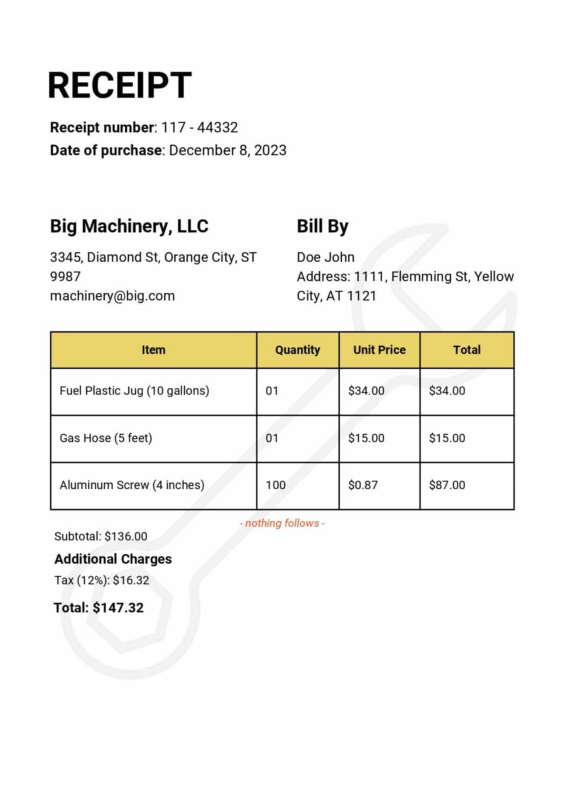

In [82]:
# read the image
from PIL import Image
import matplotlib.pyplot as plt

image = Image.open("./assets/receipt_1.jpg")

# display the image bigger
plt.figure(figsize=(15, 10))
plt.imshow(image)
plt.axis("off")
plt.show()

In [83]:
from instructor.multimodal import Image


def read_images(image_paths: List[str]) -> Receipt:
    """
    Given a list of image paths, identify the competitors in the images.
    """
    receipt, completion = ins_client.chat.completions.create_with_completion(
        model="gpt-4o-mini",
        response_model=Receipt,
        max_tokens=2048,
        temperature=0,
        messages=[
            {
                "role": "user",
                "content": [
                    "What is in this image?",
                    *[Image.from_path(path) for path in image_paths],
                ],
            }
        ],
    )
    print(completion.usage)
    return receipt

In [84]:
receipt = read_images(["./assets/receipt_1.jpg"])
print(receipt)

CompletionUsage(
    completion_tokens=51,
    prompt_tokens=36932,
    total_tokens=36983,
    completion_tokens_details=CompletionTokensDetails(
        accepted_prediction_tokens=None,
        audio_tokens=0,
        reasoning_tokens=0,
        rejected_prediction_tokens=None
    ),
    prompt_tokens_details=PromptTokensDetails(audio_tokens=0, cached_tokens=0)
)

Receipt(
    merchant='Big Machinery, LLC',
    merchant_address='3345, Diamond St, Orange City, ST 9987',
    receipt_number='117 - 44332',
    total_amount=147.32,
    receipt_date='2023-12-08'
)

#### How can we improve what we print out?

---
### Using OpenRouter keys with `instructor`

In [81]:
openrouter_api_key = getpass()

In [80]:
from openai import OpenAI
import instructor
from pydantic import BaseModel


class User(BaseModel):
    name: str
    age: int


client = OpenAI(
    base_url="https://openrouter.ai/api/v1",
    api_key=openrouter_api_key,
)

openrouter_client = instructor.from_openai(client)

resp = openrouter_client.chat.completions.create(
    model="mistralai/magistral-medium-2506",
    messages=[
        {
            "role": "user",
            "content": "Ivan is 28 years old",
        },
    ],
    response_model=User,
    extra_body={"provider": {"require_parameters": True}},
)

print(resp)

User(name='Ivan', age=28)

### Appendix